In [11]:
using Gen, Random, Distributions, Symbolics, ReverseDiff, DifferentialEquations

In [12]:
N = 64              # The number of components.
K = 3               # The target number of phases.
SIMULATION_WIDTH = 64
μ = 0; σ = 10.0
M = 1.0 

1.0

In [ ]:
# A function that will simulate the ODEs that we use to predict the number of phases. 
function simulate_phases(ϕ, p, t)
    
end

In [3]:
# The probability distribution of the number of phases based on a number of null models.
function get_pdf(χ::Matrix{Float64})
    
    @variables ϕ[1:N]

    function f(ϕ)
        res = 0.0
        for i in 1:N
            res += ϕ[i] * log(ϕ[i])
        end
        for i in 1:N 
            for j in 1:N
                res += 1/2 * χ[i,j] * ϕ[i] * ϕ[j] # s is assumed to be one of the elements in χ (just say last or smthn)
            end
        end
        return res
    end

    differentials = [Differential(ϕ[i]) for i in 1:N]
    J = Matrix{Any}(undef, N, N)
    for i in 1:N 
        for j in 1:N 
            J[i,j] = differentials[i](differentials[j](f))
        end
    end

    return f(ϕ)
end

get_pdf(ones(N, N))

UndefVarError: UndefVarError: NUM_COMPONENTS not defined

In [4]:
@gen function interaction_matrix_model() 
    # Generate the matrix. 
    χ = zeros(Float32, N, N)
    for i in 1:N
        for j in (i+1):N
            χ[i,j] = {χ => i => j} ~ normal(μ, σ)
            χ[j,i] = χ[i,j] # Symmetric
        end
    end

    # Compute the fitness function. 
    # w = 1.0
    # P = get_pdf(χ)
    # g(χ) = sum( map( k -> P(k) * exp( (k-K)^2 / (2*w^2) ), 1:N) )

    # fitness = {:fitness} ~ normal( g(χ) , 0.0)
    fitness = {:fitness} ~ normal( 0.0 , 1.0)

    # Return the matrix and fitness. 
    return (χ, fitness)
end

DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[], false, Union{Nothing, Some{Any}}[], var"##interaction_matrix_model#312", Bool[], false)

In [5]:
χ, fitness = interaction_matrix_model()
print(fitness)
χ

0.19142667632482727

64×64 Matrix{Float32}:
   0.0        -22.0566     -1.05558   …   -1.43714   -3.80539    -6.29909
 -22.0566       0.0        -0.157419       1.31174   11.9111     17.2195
  -1.05558     -0.157419    0.0           -6.58205    3.70379   -11.6997
  16.1376      10.3272     16.3825       -11.4184   -13.1772      9.25112
   0.0121161    5.41282     3.54354       -1.82991    5.35474   -10.9627
  -3.88724    -16.2819     -1.1396    …   17.091     -7.54863     6.82418
  -9.88853     -5.75531    -3.98855        9.09138    8.75162   -12.8869
 -13.1887       4.84594    -5.76568        9.56935   11.4654     -4.28489
  -0.431364     7.19244   -12.7914        -7.18707   22.793      -6.37821
  -7.64387      2.2312      3.24598       -2.28558  -17.3757    -23.4679
   ⋮                                  ⋱                         
   7.04501     -8.24156   -11.0477    …   -1.06433   -7.83802     7.13766
   5.7132     -14.5165      1.19364       -2.33964    4.54261    -7.24005
  -4.66272    -10.4576     -5

In [6]:
using Plots

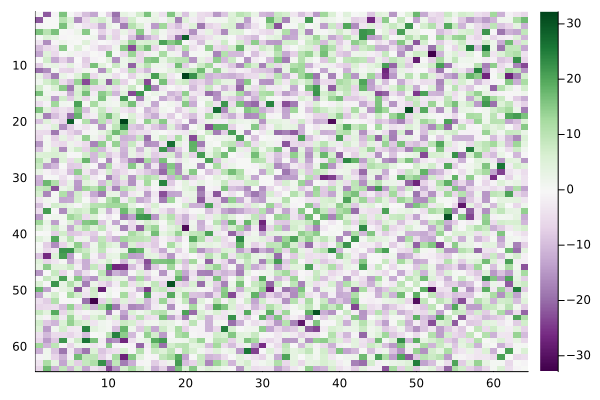

In [9]:
heatmap(χ, yflip=true, c = :PRGn)